In [228]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [229]:
# Load DataSet
df=pd.read_excel(r"/content/drive/MyDrive/Steel_industry_data.xlsx")


***Check basic info on the data set***

In [230]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [231]:
data_shape = df.shape
data_shape

(35040, 11)

In [232]:
num_rows = data_shape[0]
num_columns = data_shape[1]
print("Number of Samples:", num_rows)
print("Number of Features:", num_columns)

Number of Samples: 35040
Number of Features: 11


In [233]:
df.columns


Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [234]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Usage_kWh,35040.0,27.386892,33.444380,0.0,3.20,4.57,51.2375,157.18
Lagging_Current_Reactive.Power_kVarh,35040.0,13.035384,16.306000,0.0,2.30,5.00,22.6400,96.91
Leading_Current_Reactive_Power_kVarh,35040.0,3.870949,7.424463,0.0,0.00,0.00,2.0900,27.76
CO2(tCO2),35040.0,0.011524,0.016151,0.0,0.00,0.00,0.0200,0.07
Lagging_Current_Power_Factor,35040.0,80.578056,18.921322,0.0,63.32,87.96,99.0225,100.00
Leading_Current_Power_Factor,35040.0,84.367870,30.456535,0.0,99.70,100.00,100.0000,100.00
NSM,35040.0,42750.000000,24940.534317,0.0,21375.00,42750.00,64125.0000,85500.00


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

***Exploratory Data Analysis (EDA)***

**Pairplots using seaborn**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(

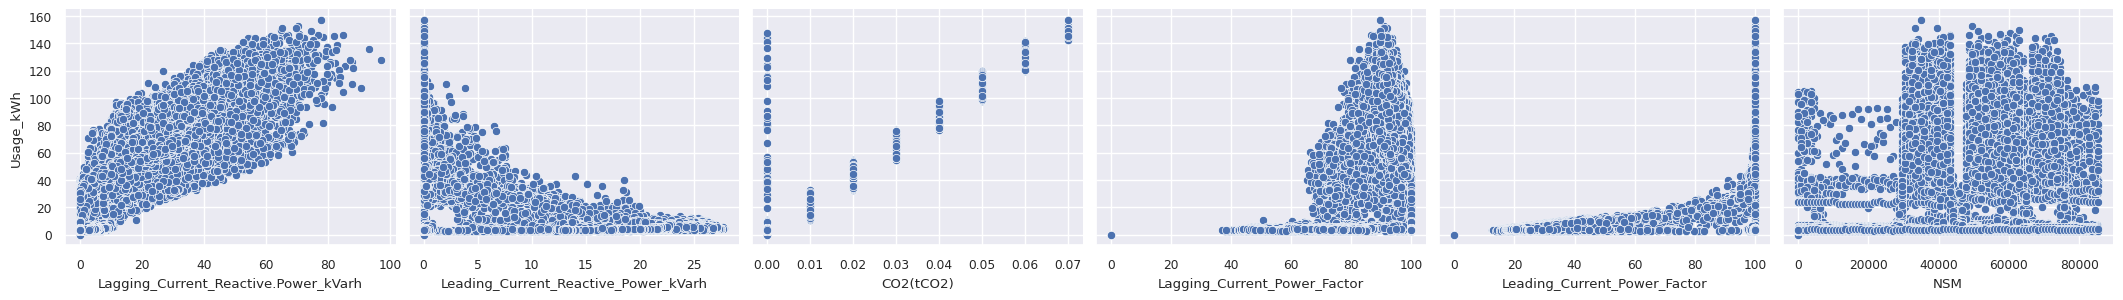

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the columns for the pair plot
cols = ['Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
        'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']

# Create the pair plot
sns.pairplot(df, x_vars=cols, y_vars='Usage_kWh', height=3, aspect=1.2, kind='scatter', palette='viridis')
plt.show()


**Average Usage by Week Status**

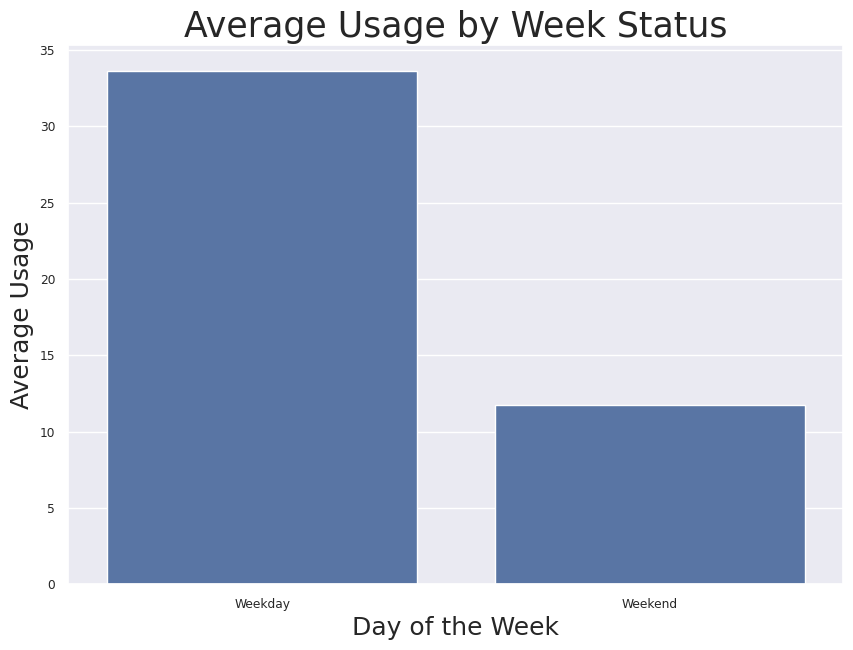

In [237]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df, x="WeekStatus", y="Usage_kWh",errorbar=None)
plt.xlabel("Day of the Week", fontsize=18)
plt.ylabel("Average Usage", fontsize=18)
plt.title("Average Usage by Week Status", fontsize=25)
plt.show()

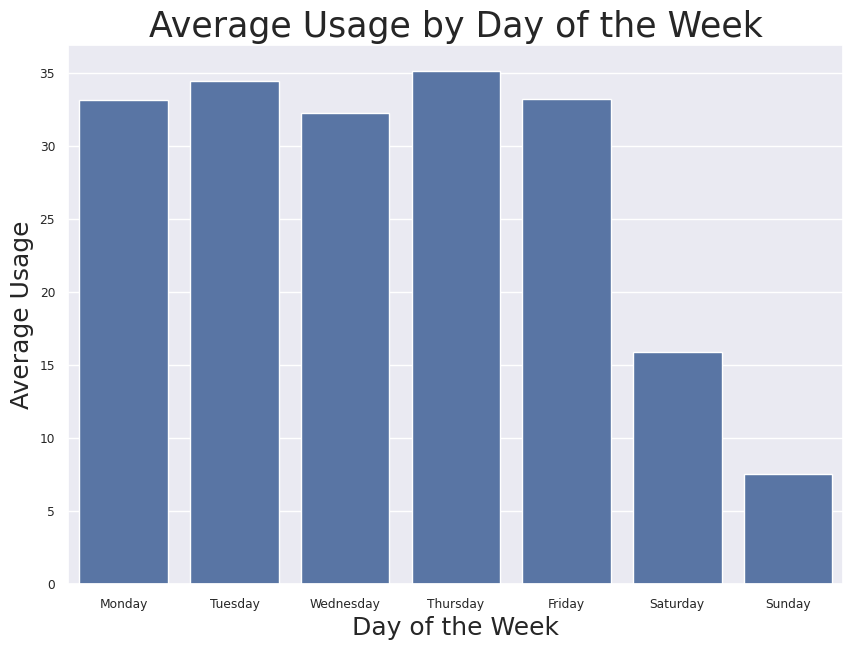

In [238]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df, x="Day_of_week", y="Usage_kWh",errorbar=None)
plt.xlabel("Day of the Week", fontsize=18)
plt.ylabel("Average Usage", fontsize=18)
plt.title("Average Usage by Day of the Week", fontsize=25)
plt.show()

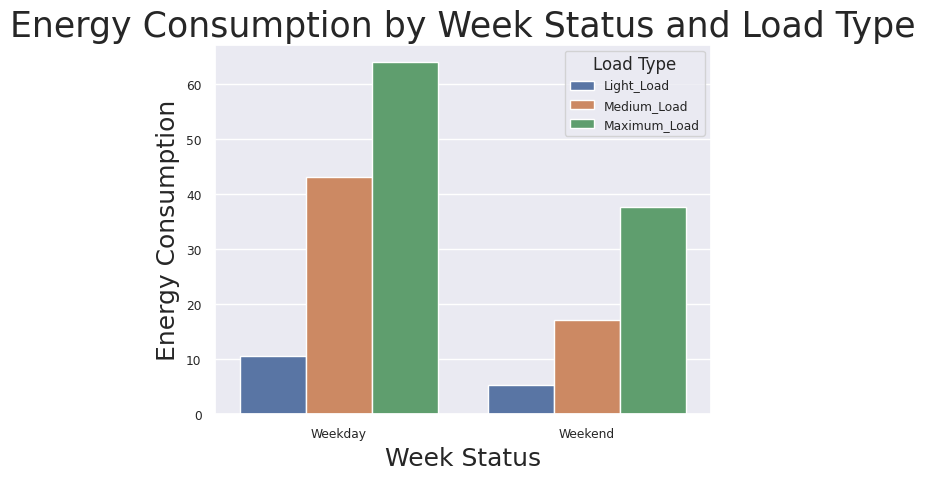

In [239]:
sns.barplot(data=df, x="WeekStatus", y="Usage_kWh", hue="Load_Type",errorbar=None)
plt.xlabel("Week Status", fontsize=18)
plt.ylabel("Energy Consumption", fontsize=18)
plt.title("Energy Consumption by Week Status and Load Type", fontsize=25)
plt.legend(title="Load Type", title_fontsize=12)
plt.show()


In [240]:
# Assuming 'date' is the datetime column, you can exclude it from the correlation calculation
df_without_date = df.drop(columns=['date','Day_of_week','WeekStatus','Load_Type'])
correlation_matrix = df_without_date.corr()
correlation_matrix


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive.Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


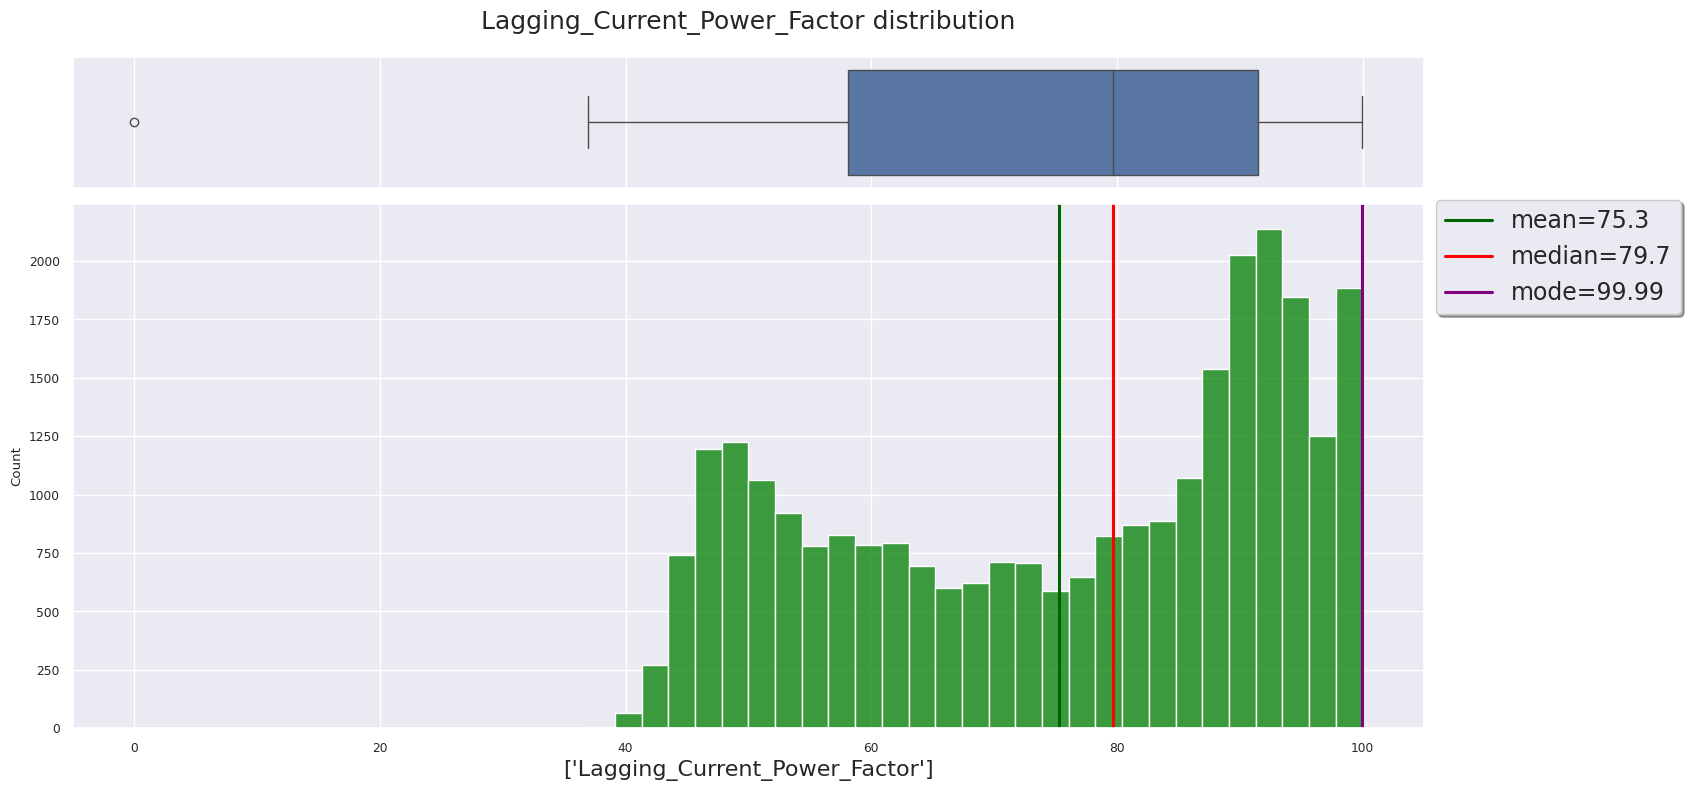

In [301]:
col = ['Lagging_Current_Power_Factor']
df_filtered = df[df['Lagging_Current_Power_Factor'] != 100]
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(17,8),gridspec_kw={"height_ratios": (.2, .8)})
ax[0].set_title('Lagging_Current_Power_Factor distribution',fontsize=18,pad=20)
sns.boxplot(x='Lagging_Current_Power_Factor', data=df_filtered, ax=ax[0])
ax[0].set(yticks=[])
sns.histplot(x='Lagging_Current_Power_Factor', data=df_filtered, ax=ax[1],color="green")
ax[1].set_xlabel(col, fontsize=16)
plt.axvline(df_filtered['Lagging_Current_Power_Factor'].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df_filtered['Lagging_Current_Power_Factor'].mean(),1)))
plt.axvline(df_filtered['Lagging_Current_Power_Factor'].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df_filtered['Lagging_Current_Power_Factor'].median(),1)))
plt.axvline(df_filtered['Lagging_Current_Power_Factor'].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df_filtered['Lagging_Current_Power_Factor'].mode()[0]))
plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
plt.tight_layout()
plt.show()

I decided to drop the values ​​equal to 100 because they were hindering the understanding of the mean and median, this value represents the system at a standstill.

distribution of each variable

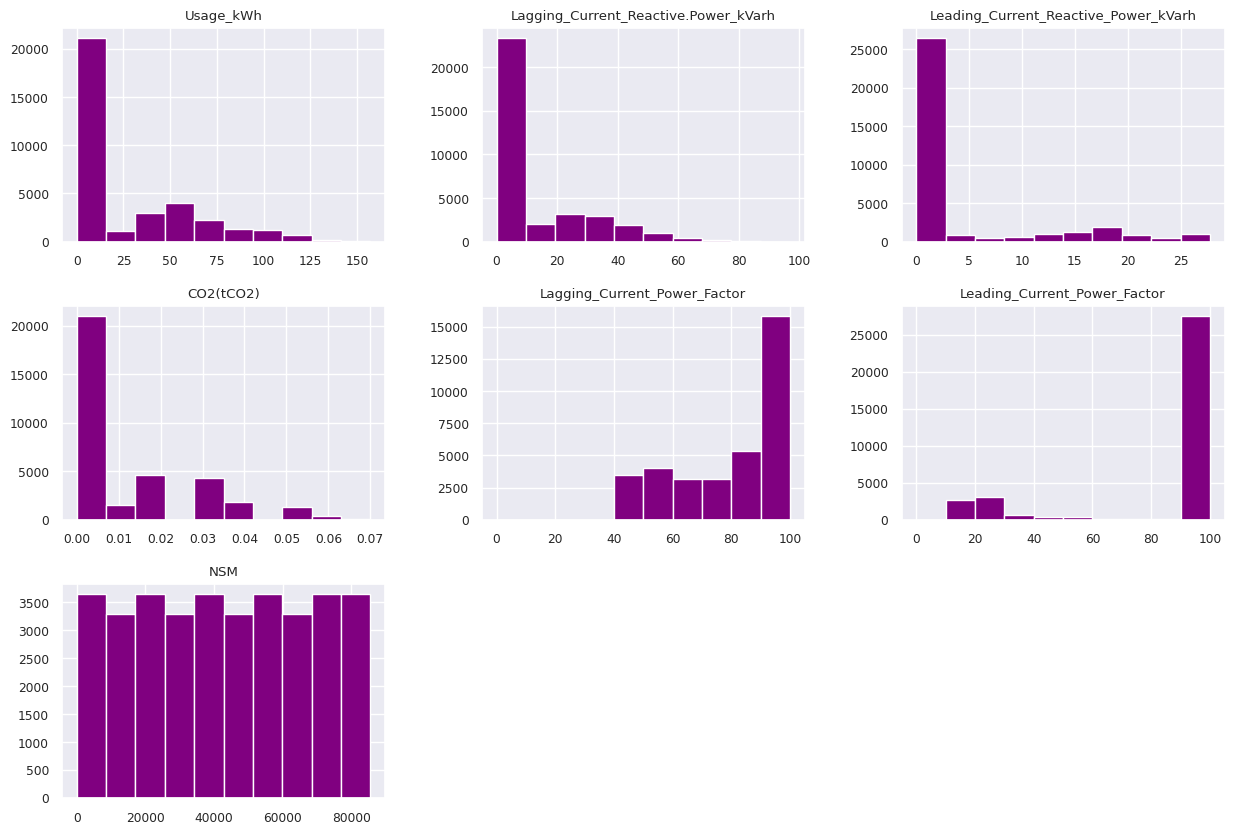

In [300]:
df.hist(figsize = (15,10),color="purple")
plt.show()

**Correlation Heatmap**

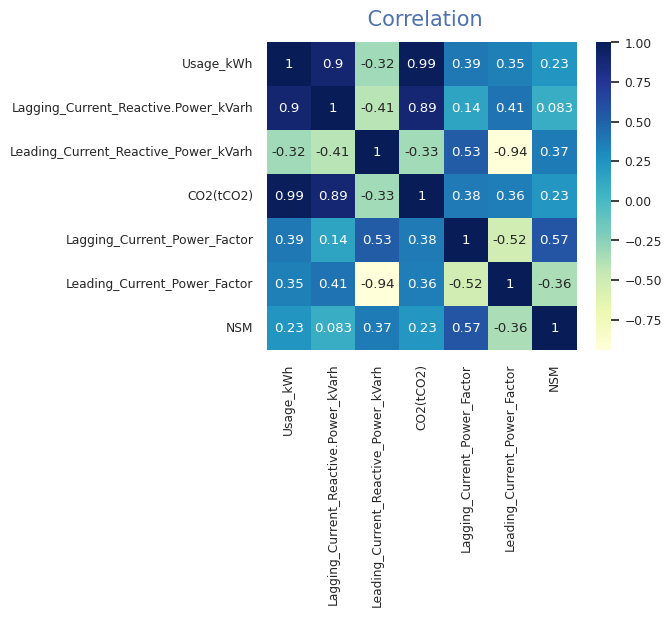

In [299]:
# Visualize the correlation using Heatmap
sns.set(font_scale=0.8)
plt.figure(figsize=(5,4))
sns.heatmap(df_without_date.corr(),annot=True,cmap = 'YlGnBu')
plt.title(" Correlation", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()

The correlation of CO² and KWH is very high and makes sense, since in practice this has a direct relationship.

Reactive Power (kVarh): This is the power that oscillates back and forth, not doing any actual work but is necessary for the system to function. It’s divided into “lagging” (inductive load) and “leading” (capacitive load).

These terms are related to electrical power systems.

Reactive Power (kVarh): This is the power that oscillates back and forth, not doing any actual work but is necessary for the system to function. It's divided into "lagging" (inductive load) and "leading" (capacitive load).

Power Factor: This is the ratio of real power (doing actual work) to apparent power (the total power supplied). It's also divided into "lagging" (when current lags behind voltage) and "leading" (when current leads the voltage).

In short, these terms describe different aspects of how electrical power is used and managed in a power system.

In [244]:
# Calculate the number of missing values in each column of the DataFrame
missing_value_counts = df.isna().sum()
missing_value_counts

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [245]:
df.dtypes

date                                     object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object

In [246]:
df=df.drop(['date'], axis=1)

In [247]:
# Perform one-hot encoding on categorical variables
df = pd.get_dummies(df)

In [248]:

df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,3.17,2.95,0.0,0.0,73.21,100.0,900,True,False,False,True,False,False,False,False,False,True,False,False
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,True,False,False,True,False,False,False,False,False,True,False,False
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,True,False,False,True,False,False,False,False,False,True,False,False
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,True,False,False,True,False,False,False,False,False,True,False,False
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,True,False,False,True,False,False,False,False,False,True,False,False


**Data Preprocessing**

*Splitting the DataFrame*

In [249]:

#Independent Features
X = df.drop(['Usage_kWh'], axis=1)
#Dependent Feature/Target
y=df.Usage_kWh

**Feature Selection**

In [250]:
# Feature Selection using SelectKBest and f_regression
from sklearn.feature_selection import SelectKBest,f_regression
y_=y.astype('int')
select_reg =  SelectKBest(k=10, score_func=f_regression).fit(X, y_)

In [251]:
X_Select = select_reg.transform(X)
X_Select.shape

(35040, 10)

In [252]:
Selected_features = pd.DataFrame({'columns': X.columns,
                              'Kept': select_reg.get_support()})
Selected_features

,columns,Kept
0,Lagging_Current_Reactive.Power_kVarh,True
1,Leading_Current_Reactive_Power_kVarh,True
2,CO2(tCO2),True
3,Lagging_Current_Power_Factor,True
4,Leading_Current_Power_Factor,True
5,NSM,False
6,WeekStatus_Weekday,True
7,WeekStatus_Weekend,True
8,Day_of_week_Friday,False
9,Day_of_week_Monday,False


**Standardizing the Features**

In [253]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_Select)

In [254]:
# Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training Set - X_train shape:", X_train.shape)
print("Testing Set - X_test shape:", X_test.shape)
print("Training Set - y_train shape:", y_train.shape)
print("Testing Set - y_test shape:", y_test.shape)

Training Set - X_train shape: (24528, 10)
Testing Set - X_test shape: (10512, 10)
Training Set - y_train shape: (24528,)
Testing Set - y_test shape: (10512,)


**Linear Regression Model**

In [255]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [256]:
#The intercept term of the linear model
lr.intercept_

27.421059176369095

In [257]:
# The coefficients of the linear model
lr.coef_


array([ 5.57750409e+00,  5.28997614e-01,  2.62637050e+01,  2.39738110e+00,
        1.94120238e+00, -1.87091675e+11, -1.87091675e+11,  1.00401123e-01,
       -9.03074894e-01, -2.25296174e-01])

In [258]:
y_pred=lr.predict(X_test)

In [259]:
lr_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
lr_model[0:5]

,Actual Value,Predicted Value,Difference
11356,2.88,3.094220,-0.214220
26543,60.77,70.359165,-9.589165
2445,120.42,124.535359,-4.115359
14649,3.13,2.533185,0.596815
32699,58.86,63.661978,-4.801978


*Model Evaluation*

In [260]:
print('LinearRegression model')
mean_squared_error=metrics.mean_squared_error(y_test,y_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(lr.score(X_train,y_train),4))
print('R sqaured testing',round(lr.score(X_test,y_test),4) )

LinearRegression model
Sqaured mean error 4.22
R squared training 0.9787
R sqaured testing 0.9841


*Actual vs. Predicted Scatter Plot*

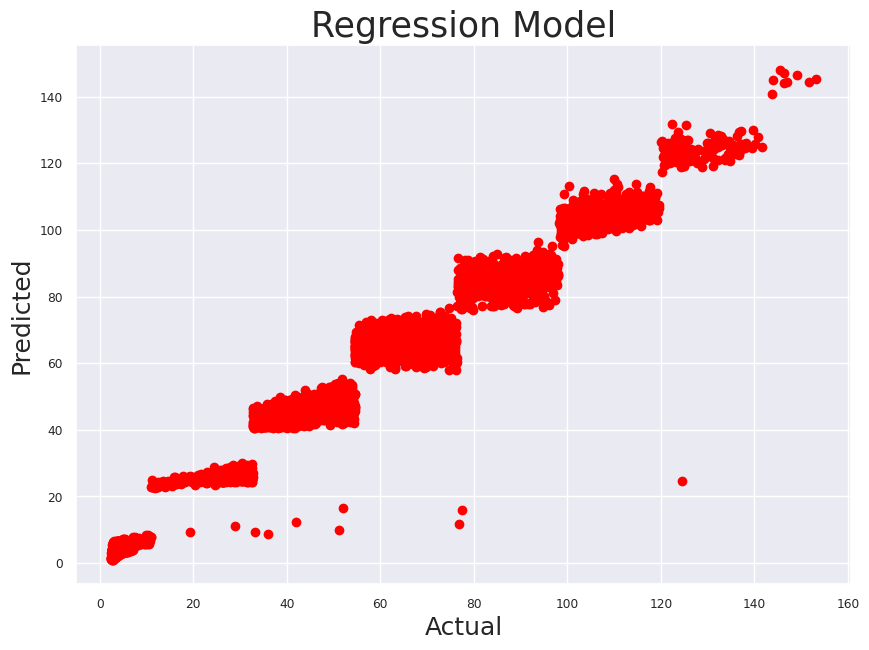

In [296]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred,color="Red")
plt.xlabel("Actual", fontsize=18,)
plt.ylabel("Predicted", fontsize=18)
plt.title("Regression Model", fontsize=25)
plt.show()

**Ridge Regression Model**

In [262]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.5)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5)

In [263]:
yridge_pred=ridge.predict(X_test)

In [264]:
ridge_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':yridge_pred,'Difference':y_test-yridge_pred})
ridge_model[0:5]

,Actual Value,Predicted Value,Difference
11356,2.88,3.093927,-0.213927
26543,60.77,70.360877,-9.590877
2445,120.42,124.531769,-4.111769
14649,3.13,2.531327,0.598673
32699,58.86,63.659942,-4.799942


*Model Evaluation*

In [265]:
print('Ridge Regression Model')
mean_squared_error=metrics.mean_squared_error(y_test,yridge_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(ridge.score(X_train,y_train),4))
print('R sqaured testing',round(ridge.score(X_test,y_test),4) )

Ridge Regression Model
Sqaured mean error 4.22
R squared training 0.9787
R sqaured testing 0.9841


*Actual vs Predicted values*

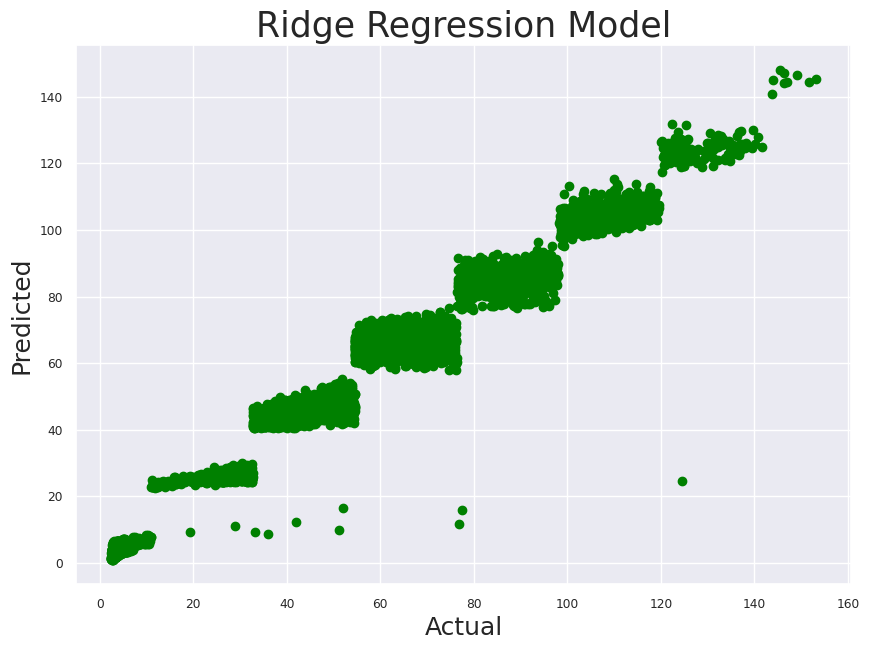

In [266]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, yridge_pred, color='green')
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("Ridge Regression Model", fontsize=25)
plt.show()

***Lasso Regression Model***

In [267]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.5)
lasso.fit(X_train,y_train)

Lasso(alpha=0.5)

In [268]:
ylasso_pred=lasso.predict(X_test)

In [269]:
lasso_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':ylasso_pred,'Difference':y_test-ylasso_pred})
lasso_model[0:5]


,Actual Value,Predicted Value,Difference
11356,2.88,3.493368,-0.613368
26543,60.77,69.359858,-8.589858
2445,120.42,124.928062,-4.508062
14649,3.13,3.980659,-0.850659
32699,58.86,62.881252,-4.021252


Model *Evaluation*

In [270]:
print('Lasso Regression Model')
mean_squared_error=metrics.mean_squared_error(y_test,ylasso_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(lasso.score(X_train,y_train),4))
print('R sqaured testing',round(lasso.score(X_test,y_test),4) )

Lasso Regression Model
Sqaured mean error 4.25
R squared training 0.9776
R sqaured testing 0.9839


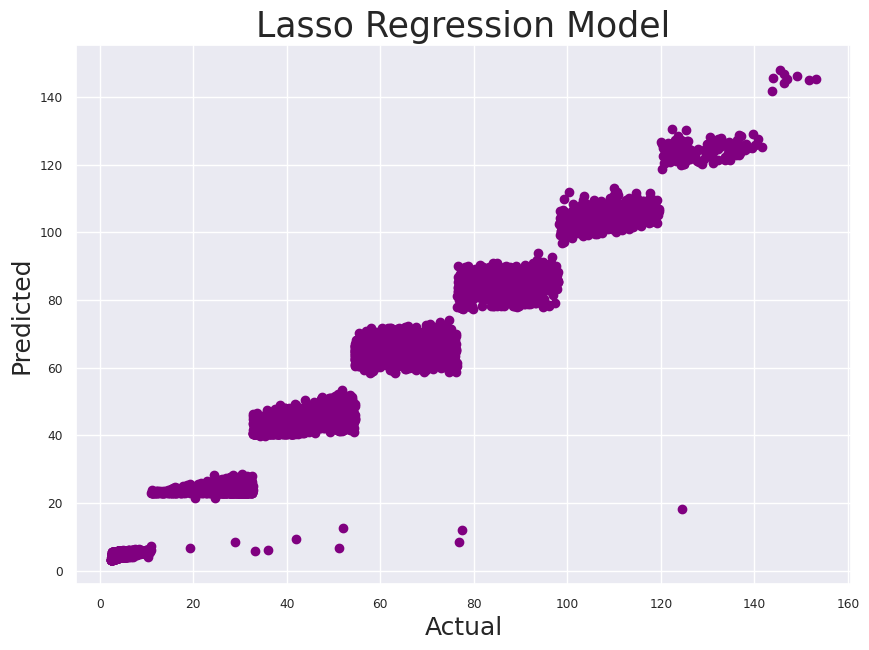

In [298]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, ylasso_pred,color="purple")
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("Lasso Regression Model", fontsize=25)
plt.show()

**ElasticNet Regression Model**

In [272]:

from sklearn.linear_model import ElasticNet
elasticNet=ElasticNet(alpha=0.5)
elasticNet.fit(X_train,y_train)

ElasticNet(alpha=0.5)

In [273]:
yelasticNet_pred=elasticNet.predict(X_test)

In [274]:
elasticNet_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':yelasticNet_pred,'Difference':y_test-yelasticNet_pred})
elasticNet_model[0:5]

,Actual Value,Predicted Value,Difference
11356,2.88,4.245874,-1.365874
26543,60.77,72.963287,-12.193287
2445,120.42,110.137992,10.282008
14649,3.13,1.770972,1.359028
32699,58.86,57.339843,1.520157


Model *Evaluation*

In [275]:
print('ElasticNet Regression model')
mean_squared_error=metrics.mean_squared_error(y_test,yelasticNet_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(elasticNet.score(X_train,y_train),4))
print('R sqaured testing',round(elasticNet.score(X_test,y_test),4) )


ElasticNet Regression model
Sqaured mean error 6.76
R squared training 0.9566
R sqaured testing 0.9592


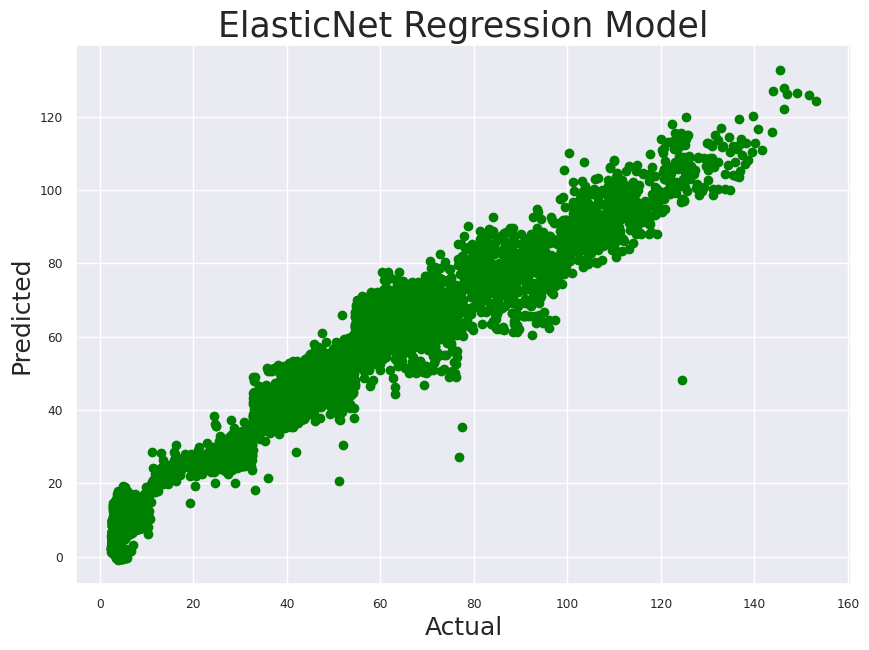

In [294]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, yelasticNet_pred,color="green")
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("ElasticNet Regression Model", fontsize=25)
plt.show()

**Support Vector Regression Model**

In [277]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR()

In [278]:
yregressor_pred = regressor.predict(X_test)
regressor_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':yregressor_pred,'Difference':y_test-yregressor_pred})
regressor_model[0:5]


,Actual Value,Predicted Value,Difference
11356,2.88,2.900659,-0.020659
26543,60.77,60.664819,0.105181
2445,120.42,123.828997,-3.408997
14649,3.13,3.170616,-0.040616
32699,58.86,61.481721,-2.621721


In [279]:
print('Support Vector Regression Model')
mean_squared_error=metrics.mean_squared_error(y_test,yregressor_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(regressor.score(X_train,y_train),4))
print('R sqaured testing',round(regressor.score(X_test,y_test),4) )

Support Vector Regression Model
Sqaured mean error 2.57
R squared training 0.9936
R sqaured testing 0.9941


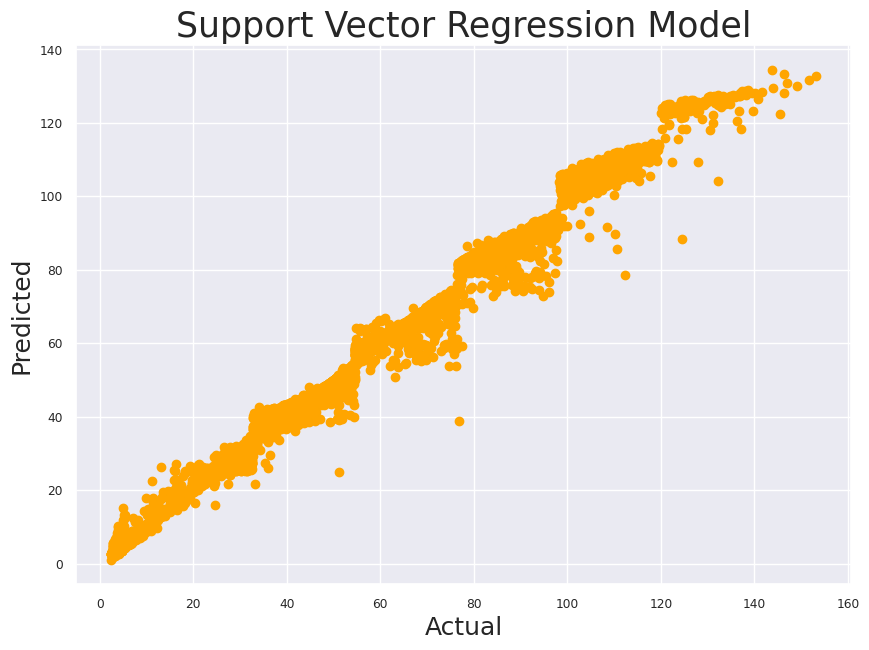

In [293]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test,yregressor_pred,color="orange")
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("Support Vector Regression Model", fontsize=25)
plt.show()

**Regression Models Comparison**

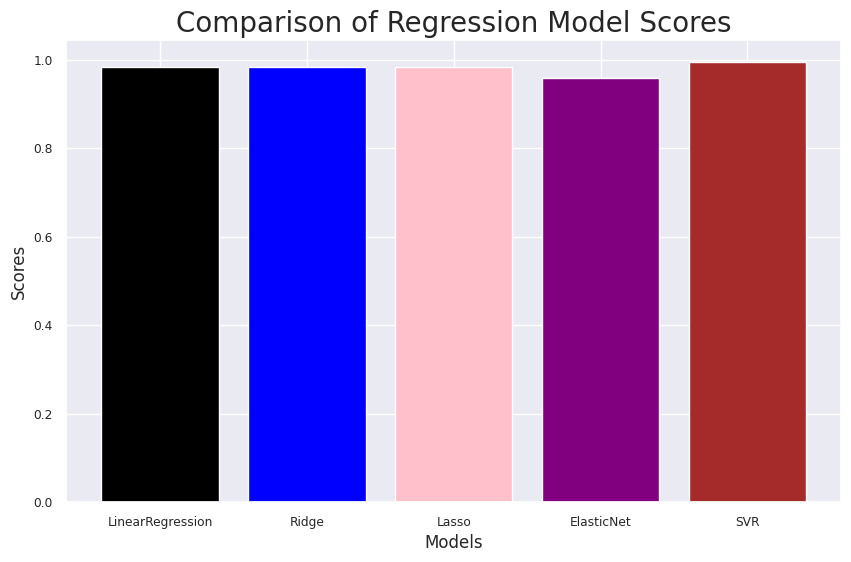

In [291]:
# Comparison of Regression Model R2 Scores
models = ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet', 'SVR']
score = [lr.score(X_test, y_test),
         ridge.score(X_test, y_test),
         lasso.score(X_test, y_test),
         elasticNet.score(X_test, y_test),
         regressor.score(X_test, y_test)]
colors = ['black', 'blue', 'pink', 'purple', 'brown']

plt.figure(figsize=(10, 6))
plt.bar(models, score, color=colors)
plt.xlabel('Models',fontsize=12)
plt.ylabel('Scores',fontsize=12)
plt.title('Comparison of Regression Model Scores',fontsize=20)
plt.show()

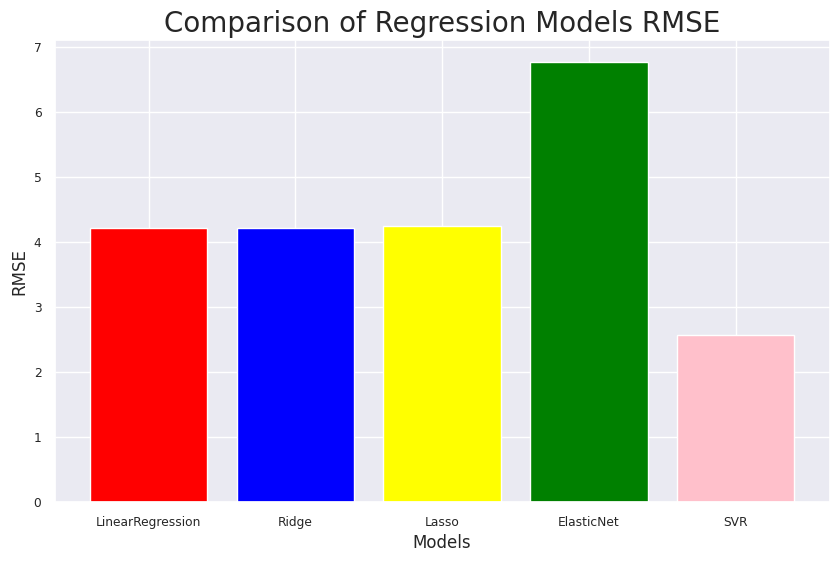

In [290]:
# Comparison of Regression Models RMSE
rmse = [np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, yridge_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, ylasso_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, yelasticNet_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, yregressor_pred))]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse, color=['red', 'blue', 'yellow', 'green', 'pink'])
plt.xlabel('Models',fontsize=12)
plt.ylabel('RMSE',fontsize=12)
plt.title('Comparison of Regression Models RMSE',fontsize=20)
plt.show()

In [283]:
import pickle


In [284]:
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr, file)

In [285]:
with open('regressor_model.pkl', 'wb') as file:
    pickle.dump(regressor, file)

In [286]:
with open('elasticNet_model.pkl', 'wb') as file:
    pickle.dump(elasticNet, file)

In [287]:
with open('lasso_model.pkl', 'wb') as file:
    pickle.dump(lasso, file)

In [288]:
with open('ridge_model.pkl', 'wb') as file:
    pickle.dump(ridge, file)